import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np

%matplotlib inline# Homework 8

This assignment uses a data set with building information about sales in New York City over a 12 month period.  The data is originally from Kaggle [here](https://www.kaggle.com/new-york-city/nyc-property-sales) and can be downloaded directly from the URL: [http://comet.lehman.cuny.edu/owen/teaching/mat328/nyc-rolling-sales.csv](http://comet.lehman.cuny.edu/owen/teaching/mat328/nyc-rolling-sales.csv).
 

### Question 1: Load and clean the data

In this dataset, the missing values are indicated by " -  " (a space, a dash, two spaces).

Clean the data so that the remaining rows:
* have no NaN values
* have sales prices between \$20,000 and \$2,000,000.  (That is, remove all rows with sales price less than \$20,000 or more than \$2,000,000)
* have only the neighborhoods Astoria, Harlem-Central, and Jackson Heights (in the data as "ASTORIA", "HARLEM-CENTRAL", and "JACKSON HEIGHTS", respectively)
* have Gross Square Feet greater than 0 and less than 6,000

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np

%matplotlib inline

In [34]:
data = pd.read_csv("http://comet.lehman.cuny.edu/owen/teaching/mat328/nyc-rolling-sales.csv", na_values=" -  ")

In [35]:
data = data.dropna(how="all")

In [36]:
data['SALE PRICE'] = pd.to_numeric(data['SALE PRICE'])

In [37]:
data = data[data['SALE PRICE'].between(20000, 2000000)]

In [40]:
neighborhoods = ["ASTORIA", "HARLEM-CENTRAL", "JACKSON HEIGHTS"]
boolean_series = data['NEIGHBORHOOD'].isin(neighborhoods)
data = data[boolean_series]

In [43]:
data = data[data['GROSS SQUARE FEET'].between(0.0, 6000.0)]

### Question 2:  Exploratory data analysis

a) Using your cleaned data, create a scatter plot of Gross Square Feet (x) vs. Sale Price (y) with the points colored by neighborhood.

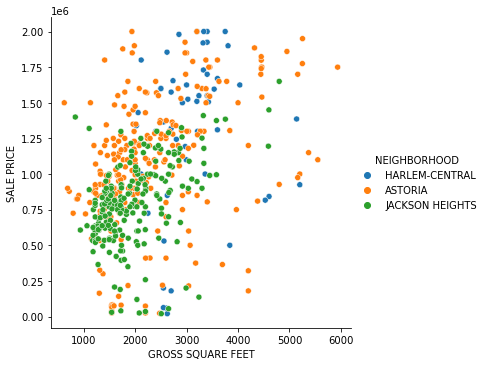

In [47]:
sns.relplot(x="GROSS SQUARE FEET", y="SALE PRICE", hue="NEIGHBORHOOD", data=data)

2b) What do you notice about the plot?

<b>Answer 2b:<\b> Some of the more expensive apartments are quite small. The data also seems to be very spread out.

### Question 3: Dummy variables

a) Create dummy variables for the neighborhood column, and create a linear model (see note below) to predict the sales price (as the dependent variable) using the two neighborhood dummy variables and the gross square feet as the independent variables.    

Note: Since some of the column names have spaces, you will need to either rename them (can do as part of cleaning the data) or surround them with Q('column_name') in the Statsmodel formula.  For example if the independent variable column names are "Ind Var" and "Ind Var 2", and the dependent variable column name is "Dep Var" in the dataframe df, then the code to fit the linear model is:
    
`lm = smf.ols("Q('Dep Var') ~ Q('Ind Var') + Q('Ind Var 2')", data = df).fit()`

In [51]:
data_new = pd.get_dummies(data, columns = ["NEIGHBORHOOD"], drop_first = True)
data_new.head(1)

,Unnamed: 0,BOROUGH,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,NEIGHBORHOOD_HARLEM-CENTRAL,NEIGHBORHOOD_JACKSON HEIGHTS
4801,4805,1,01 ONE FAMILY DWELLINGS,1,1960,41,,A9,307 WEST 136 STREET,,...,1,1665.0,3200.0,1910,1,A9,1510000.0,2017-01-03 00:00:00,1,0


In [61]:
lm = smf.ols("Q('SALE PRICE') ~ Q('NEIGHBORHOOD_HARLEM-CENTRAL') + Q('NEIGHBORHOOD_JACKSON HEIGHTS')", data = data_new).fit()

In [62]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q('SALE PRICE')   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     44.36
Date:                Sun, 27 Feb 2022   Prob (F-statistic):           1.73e-18
Time:                        17:22:53   Log-Likelihood:                -7354.9
No. Observations:                 513   AIC:                         1.472e+04
Df Residuals:                     510   BIC:                         1.473e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          1.068e+06   2.56e+04     41.654      0.000    1.02e+06    1.12e+06
Q('NEIGHBORHOOD_HARLEM-CENTRAL')   2.433e+05   6.27e+04      3.879      0.000     1.2e+05    3.67e+05
Q('NEIGHBORHOOD_JACKSON HEIGHTS') -2.749e+05   3.82e+04     -7.190      0.000    -3.5e+05      -2e+05
==============================================================================
Omnibus:                       18.191   Durbin-Watson:                   1.658
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.763
Skew:                          -0.418   Prob(JB):                     5.11e-05
Kurtosis:                       3.476   Cond. No.                         3.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

3b) What is the equation for the regression line? 

**Answer 3b:** $Y = 1.068 + 2.433 X1 + -2.749 X2$

3c) What simplified equation is used to make a prediction when the neighborhood is Astoria?  Harlem-Central?  Jackson Heights? 

**Answer 3c:** 
<ol>
<li>Astoria: $Y = 1.068$

<li>Harlem Central: $Y = 1.068 + 2.433 X1$

<li>Jackson Height: $Y = 1.068 + 2.749 X2$
</ol>

### Question 4:  Assessing linear model, part 1

We will now assess the fit of your linear model from Question 3.

a) What is the p-value for the intercept and coefficients?  What do these p-values tell us?

**Answer 4a:** The $P$ value is $0.000$. This tells us that there is little to no probability that those given features are equal to zero in the data.

4b) What is R-squared, and what does it tell us?

**Answer 4b:** $R^2$ tells us the proportion to which the model correctly predicted the response variable of a given set of inputs. It is scaled between 0 and 1, where 1 means it perfectly predicted every response variable.

### Question 5: Assessing linear model, part 2

a) Plot the residuals of your linear model from Question 3.

<AxesSubplot:>

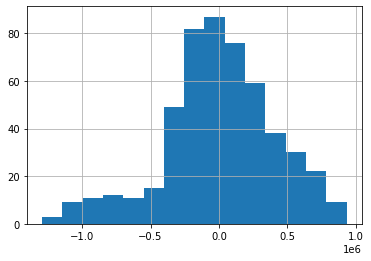

In [63]:
lm.resid.hist(bins=15)

5b) What do you notice about the residual plot?  What does it tell us about the model?

**Answer 5b:** The distribution is not normal, but <i>is</i> centered at 0, which is optimal. The fact that there is a positive skew to this distribution tells us that the model under predicts more often than it over predicts or gets it right.

5c) Plot the actual sale price on the x axis and the residuals on the y axis.

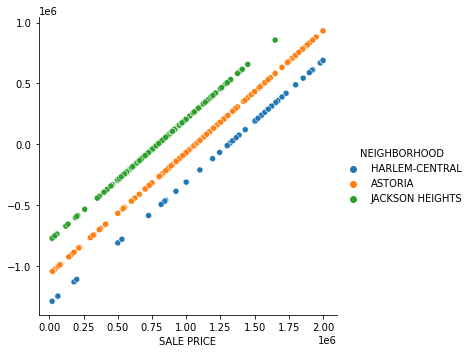

In [65]:
sns.relplot(x="SALE PRICE", y=lm.resid, hue = "NEIGHBORHOOD", data=data)

5d) What do you notice about this plot of the actual sale price vs. residuals?  What does it tell us about our model?

**Answer 5d:** This plot tells us that the model is bad at predicting the sale price at every level. It over estimates the cheaper apartments and under estimates the expensive ones.

5e) Based on your answers to Questions 4 and 5, how good of fit is your model?  Why?

**Answer 5e:** This model is not a good fit. It almost always over- or under-estimates and is not helped by breaking up the data by neighborhood. In this case, a separate model for each neighborhood would be optimal.

### Bonus Question

In Question 3c you wrote 3 linear equations for predicting the sale price if a building was in Astoria, Harlem-Central, or Jackson Heights.  Plot lines given by the 3 equations on a scatterplot of gross square feet (x) vs. sale price.  What does the plot tell you about real estate in Astoria, Harlem-Central, and Jackson Heights?    Hint:  See the end of Section 3 in Lab 8